# sup_classification

100%|██████████| 157/157 [00:01<00:00, 80.46it/s]


Epoch 1/10, Training Loss: 0.5759, Validation Loss: 0.1314, Validation Accuracy: 96.13%


100%|██████████| 157/157 [00:01<00:00, 80.53it/s]


Epoch 2/10, Training Loss: 0.1074, Validation Loss: 0.0771, Validation Accuracy: 97.54%


100%|██████████| 157/157 [00:02<00:00, 58.73it/s]


Epoch 3/10, Training Loss: 0.0716, Validation Loss: 0.0768, Validation Accuracy: 97.49%


100%|██████████| 157/157 [00:01<00:00, 80.45it/s]


Epoch 4/10, Training Loss: 0.0510, Validation Loss: 0.0592, Validation Accuracy: 98.04%


100%|██████████| 157/157 [00:02<00:00, 60.97it/s]


Epoch 5/10, Training Loss: 0.0414, Validation Loss: 0.0581, Validation Accuracy: 98.12%


100%|██████████| 157/157 [00:01<00:00, 80.57it/s]


Epoch 6/10, Training Loss: 0.0314, Validation Loss: 0.0470, Validation Accuracy: 98.46%


100%|██████████| 157/157 [00:02<00:00, 78.08it/s]


Epoch 7/10, Training Loss: 0.0276, Validation Loss: 0.0440, Validation Accuracy: 98.61%


100%|██████████| 157/157 [00:01<00:00, 80.68it/s]


Epoch 8/10, Training Loss: 0.0192, Validation Loss: 0.0522, Validation Accuracy: 98.32%


100%|██████████| 157/157 [00:02<00:00, 70.61it/s]


Epoch 9/10, Training Loss: 0.0168, Validation Loss: 0.0460, Validation Accuracy: 98.64%


100%|██████████| 157/157 [00:02<00:00, 77.58it/s]


Epoch 10/10, Training Loss: 0.0133, Validation Loss: 0.0497, Validation Accuracy: 98.43%


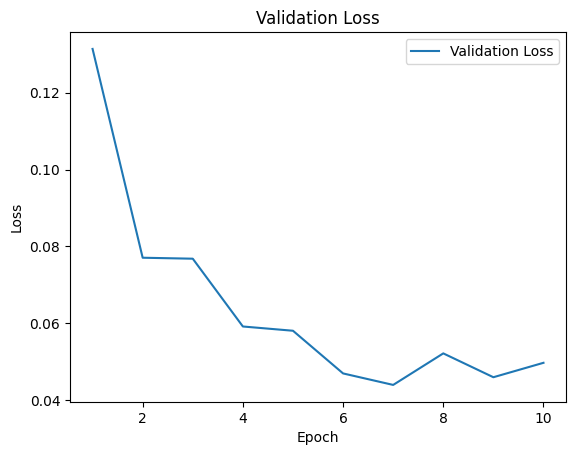

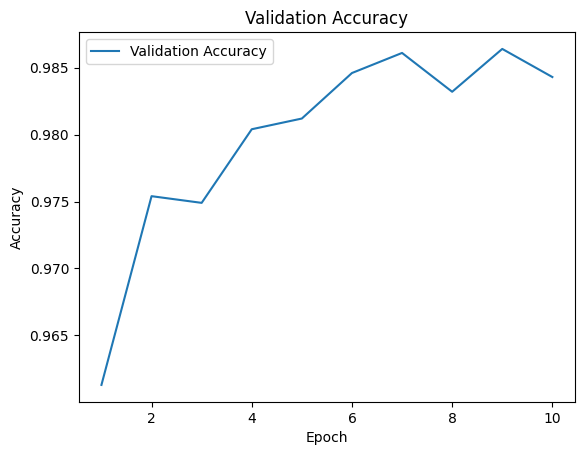

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

################### Complete the code below ###################
# Define a CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

###############################################################

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# take a stratified subset of the training data, keeping only 5000 samples, with 500 samples per class
train_targets = train_dataset.targets
train_idx, _ = train_test_split(range(len(train_targets)), train_size=20000, stratify=train_targets)
train_dataset = torch.utils.data.Subset(train_dataset, train_idx)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

################### Complete the code below ###################
# Initialize the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
################### Complete the code below ###################

# Training loop
val_losses = []
val_accuracies = []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # moves the model to training mode
    running_loss = 0.0
    for images, labels in tqdm(train_loader):
        ################### Complete the code below ###################
        # perform a full iteration of training
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        ###############################################################
        running_loss += loss.item()

    # Validation
    model.eval()  # moves the model to evaluation mode
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():  # Temporarily set all the requires_grad flags to false
        for images, labels in tqdm(test_loader):
            images, labels = images.to(device), labels.to(device)   # TODO new line
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    val_loss /= len(test_loader)
    accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {accuracy*100:.2f}%')

################### Complete the code below ###################
# plot the validation loss and accuracy
epochs = range(1, num_epochs + 1)
plt.figure()
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()
###############################################################